To detect negative speech in tweets. Here we are gonna train and develop a simple Twitter Sentiment Analysis supervised learning model using python and NLP libraries.

## Dataset : 
The data set contains tweets and sentiment related to it. Here we need to predict the sentiment for a given tweet.
Here, in label 
* __label “0”: Positive Sentiment__ 
* __label “1”: Negative Sentiment__  

* __nltk__ : Natural Language Tool Kit is a natural language processing library that contains packages to make machines understand human language and reply to it with an appropriate response.
* __Pandas__ : For analysis and manipulation of data 
* __Numpy__ : To handle matrices and arrays of large size
* __Sklearn__ : To easily handle machine learning operations
* __Pickle__ : It is an object serializer and we are using it to save our model.
* __Seaborn__ : For statistical data visualization.
* __re__ : To use regular expressions

In [142]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import nltk
import re
import seaborn
import warnings  # To ignore warnings
warnings.filterwarnings('ignore')
import IPython # To diplay images
import texttable as tt  # To print data in tabular format

## Step 2: Import datasets

Read the data with pandas.
* __twitter_data.csv__ : It contains tweets with its corresponding sentiment. We'll use this to train as well as test our model to predict the sentiment behind the tweet.

In [246]:
try:
    data  = pd.read_csv("Dataset/twitter_data.csv")
except FileNotFoundError:
    print("File does not exist!")

In [247]:
print("First 5 observations from the data : ")
print(data.head())

First 5 observations from the data : 
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [248]:
data.shape

(31962, 3)

Here, 31962 is the number of observations data set, and 3 is the number of columns in the data set.

In [146]:
data.to_csv('CSVs/01_original_data.csv')

### Hashtags
The graph shows normal tweets. Check the top 20 most used hashtags and plot them according to their frequency.
- Following is the graphical representation for the most occurred hashtags in data with positive sentiment.
- __Hashtag__ : A word or phrase preceded by a hash sign (#), used on social media websites and applications, especially Twitter, to identify messages on a specific topic.

In [147]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in data['tweet'][data['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

[Text(0, 0.5, 'Count')]

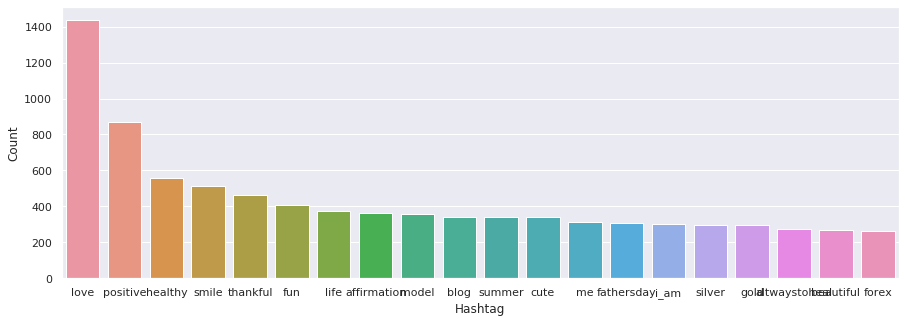

In [148]:
#Select top 20 most frequent hashtags and plot them 
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot( data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

The graph shows negative tweets. In negative tweets, 20 hashtags that appeared the most are shown in graph.
- Following is the graphical representation for the most occurred hashtags in data with negative sentiment.




In [149]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in data['tweet'][data['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

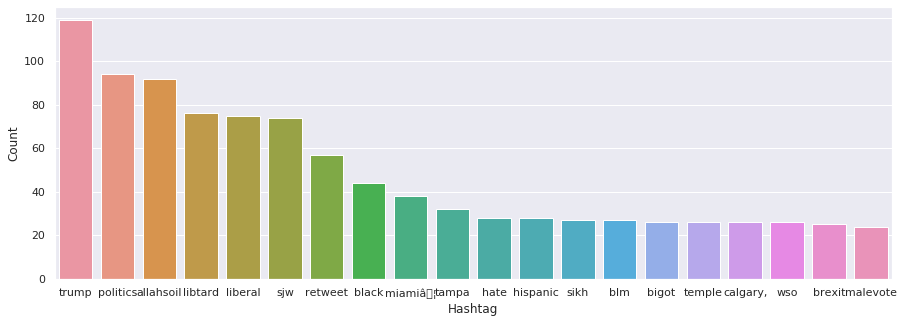

In [150]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot(data=most_frequent, x= "Hashtag", y = "Count")


- From both plots, we can conclude that hashtags are very important for sentiment analysis and should not be ignored.
- Words used like love, friend, happy are used in positive tweets whereas negative can be found in words like trump, black, politics, etc.

## Step 3 : Data cleaning and Preprocessing

### __Lemmating__ and __Tokenization__

In data cleaning, we remove the unwanted contents from data so that we can get better accuracy. 
Here we are converting each word in its root form. Some times we want our program to recognize that the words “register” and “registration” are just different tenses of the same verb, like for example, we have two questions "How do I register for BridgeLabz?" and "What is the registration processing for BridgeLabz?". Here we want our program to know that registration and register are the same so their answers are also the same, and that's the reason why we lemmatize.

* First we'll tokenize each word from the dataset.
- __Tokenizing__ : This breaks up the strings into a list of words or pieces based on a specified pattern using Regular Expressions aka RegEx. 
- eg : white brown fox = ‘white’, ‘brown’, ’fox’

* After we tokenize, we will start cleaning up the tokens by Lemmatizing. 
- __Lemmatizing__ : Lemmatizing is the process of converting a word into its root form.
- e.g., "Playing", "Played" = "play".

In [193]:
def lemmatizeation(data):

    stop_words = set(nltk.corpus.stopwords.words('english'))

    lemma_function = nltk.stem.wordnet.WordNetLemmatizer()
    
    tokenizer = nltk.tokenize.TweetTokenizer()
    sentence = []
    for text in data:
        lemma = []
        text = ' '.join(re.sub("(@[A-Za-z0-9]+)"," ",a).split())
        tokens = tokenizer.tokenize(text) 
        for token in tokens:
            if token not in stop_words:
                lemma.append(lemma_function.lemmatize(token))
        sentence.append(" ".join(lemma))

    return sentence

In [194]:
cleaned_tweet = lemmatizeation(list(data['tweet']))

- Add the cleaned data to the data frame.

In [249]:
data['cleaned_tweet'] = cleaned_tweet

In [250]:
print("Original tweet ::\n  ",data['tweet'].iloc[1])
print('='*90)
print("Cleaned tweet ::\n  ",data['cleaned_tweet'].iloc[1])

Original tweet ::
   @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Cleaned tweet ::
   thanks #lyft can't use cause offer wheelchair van pdx #disapointed #getthanked


## Step 3: Split data into train and test datasets
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate our model is.
* Here we are spliting the data so that the training dataset contains 80% of the data and test dataset contains 20% of the total data.
* __test_size__ : Here we specify the size we want for our test dataset.
* __random_state__ : When we use a random number generator for number or sequence generation, we give a  starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split(). 

In [251]:
feature_train, feature_test, label_train, label_test = sklearn.model_selection.train_test_split(data['cleaned_tweet'], 
                                                                                                    data['label'], 
                                                                                                    random_state = 42,
                                                                                                    test_size = 0.2)

After splitting, the size of the train and test data sets are:

In [200]:
# print("Size of features for train : ", train_features.shape)
# print("Size of labels for train : ", train_labels.shape)
# print("Size of features for test : ", test_features.shape)
# print("Size of labels for test : ", test_labels.shape)
def display_shapes():
    tab = tt.Texttable()
    namespace = globals()
    headings = ['Name','Shape']
    variable_names = ['feature_train', 'feature_test', 'label_train', 'label_test']
    tab.header(headings)
    for name in variable_names:
        tab.add_row([name, eval(name).shape])
    return print(tab.draw())

display_shapes()

+---------------+----------+
|     Name      |  Shape   |
+===============+==========+
| feature_train | (25569,) |
+---------------+----------+
| feature_test  | (6393,)  |
+---------------+----------+
| label_train   | (25569,) |
+---------------+----------+
| label_test    | (6393,)  |
+---------------+----------+


In [201]:
train_features.to_csv('CSVs/02.1_train_features.csv')
train_labels.to_csv('CSVs/02.2_train_labels.csv')
test_features.to_csv('CSVs/02.3_test_features.csv')
test_labels.to_csv('CSVs/02.4_test_labels.csv')

# Step 4 : Model Creation

## Applying Bag-of-Words

 - Bag of words is nothing but a collection of all the unique words along with its number of occurrences in our dataset. It is AKA Corpus.
 - As the machine can't understand text data, we need to convert it in numeric form. So we count the occurrence of each word and save it. This is our bag of words.
 - __Approaches build Bag of Words__:
     - 1. Count Occurrence:
     - 2. TF-IDF

# __CountVectorizer__
Counting word occurrence. The reason behind using this approach is that keyword or important signal will occur again and again. So if the number of occurrences represents the importance of the word. More frequency means more importance.

In [252]:
cv = sklearn.feature_extraction.text.CountVectorizer()
cv.fit(train_features)
test_features_vectorized = cv.transform(test_features)
print('Total Features =', len(cv.get_feature_names()))
train_features_vectorized = cv.transform(train_features)

Total Features = 34687


In [253]:
test_features_vectorized, train_features_vectorized

(<6393x34687 sparse matrix of type '<class 'numpy.int64'>'
 	with 45842 stored elements in Compressed Sparse Row format>,
 <25569x34687 sparse matrix of type '<class 'numpy.int64'>'
 	with 203140 stored elements in Compressed Sparse Row format>)

In [254]:
pd.DataFrame([cv.vocabulary_]).T.to_csv('CSVs/03_Vocabulary.csv')

- Here we are going to apply two algorithms on our data
- Logistic regression the simplest classification algorithm and one of the most efficient algorithms.

## __Logistic Regression__

In [205]:
logistic_model_cv = sklearn.linear_model.LogisticRegression()
logistic_model_cv.fit(train_features_vectorized, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict using our model

In [206]:
pred = logistic_model_cv.predict(test_features_vectorized)

In [207]:
print('Accuracy_score :', sklearn.metrics.accuracy_score(test_labels, pred))

Accuracy_score : 0.9593305177537932


- ### Confusion matrix:
Now, up to here we have done data cleaning, pre-processing, feed it to the algorithm, got our outputs with 96% accuracy, but what about effectiveness of our model. Better the effectiveness, better the performance and that are exactly what we want. So to check the effectiveness of our model we need to check all the predictions and compare them. Here confusing matrix comes in the picture. Confusion Matrix is a performance measurement for machine learning classification. 

In [208]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5895,   42],
       [ 218,  238]])

- __Recall__ : Out of all the positive classes, how much we predicted correctly. It should be high   as possible.

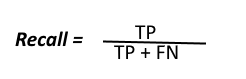

In [209]:
IPython.display.Image("images/recall.png")

- __Precision__ : Out of all the positive classes we have predicted correctly, how many are actually positive.

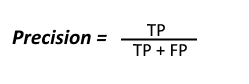

In [210]:
IPython.display.Image("images/precision.png")

- __F1_measure__ : It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. 

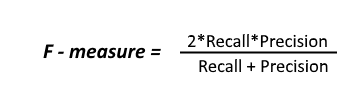

In [211]:
IPython.display.Image("images/f1_score.png")

In [230]:
f1_score_logistic_cv = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_logistic_cv)

F1 : 0.6438356164383562


- ### Confusion Matrix :

In [213]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5895,   42],
       [ 218,  238]])

- ### Save model for Logistic regrssion:

In [214]:
with open('model/count_vectorizer/logistic_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(logistic_model_cv, file)

## __SVM__

In [215]:
SVM_cv = sklearn.svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_cv.fit(train_features_vectorized, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ### Predict values using our model:
    - Here we'll make predictions on vectorized test features

In [216]:
pred = SVM_cv.predict(test_features_vectorized)

- ### Calculate f1 score
     - F-score helps to measure test's accuracy for classification type of problems

In [232]:
f1_score_svm_cv = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_svm_cv)

F1 : 0.6438356164383562


- ### Confusing Matrix

In [255]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5898,   39],
       [ 221,  235]])

- ### Save model for SVM:

In [219]:
with open('model/count_vectorizer/svm_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(SVM_cv, file)

Logistic Regression performed well then Naive Bayes for the default parameters. Thus, we will be using only Logistic Regression ahead.

# __Tfidf__

- TF-IDF take another approach which is believe that high frequency may not able to provide much information gain. In another word, rare words contribute more weights to the model.
- Word importance will be increased if the number of occurrence within same document (i.e. training record). On the other hand, it will be decreased if it occurs in corpus (i.e. other training records).
- In simple words it removes the stopwords and stores the important words which might be used less but gives us more better features and stores the frequency of the words.

# __WHICH ONE TO KEEP__

- This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

- TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

- Let’s have a look at the important terms related to TF-IDF:

    - TF = (Number of times term t appears in a document)/(Number of terms in the document)
    - IDF = log(N/n), where, N is the number of documents and n is the number of documents a               term t has appeared in.
    - TF-IDF = TF*IDF

In [220]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
tf = sklearn.feature_extraction.text.TfidfVectorizer()
tf.fit(train_features)
test_features_vectorized = tf.transform(test_features)
print('Total Features =', len(tf.get_feature_names()))
train_features_vectorized = tf.transform(train_features)

Total Features = 34687


## __Logistic Regression__

In [221]:
logistic_model_tf = sklearn.linear_model.LogisticRegression()
logistic_model_tf.fit(train_features_vectorized, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

- ### Predict values using our model:
- Here we'll make predictions on vectorized test features

In [222]:
pred = logistic_model_tf.predict(test_features_vectorized)

- ### Calculate f1 score
 F-score helps to measure test's accuracy for classification type of problems

In [233]:
f1_score_logistic_tfidf = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_logistic_tfidf)

F1 : 0.6438356164383562


- ### Confusion Matrix

In [224]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5922,   15],
       [ 317,  139]])

- ### Save model for SVM:

In [225]:
with open('model/TF-IDF/logistic_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(logistic_model_tf, file)

## __SVM__

In [226]:
SVM_tf = sklearn.svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_tf.fit(train_features_vectorized, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ### Predict values usin our model:
    - Here we'll make predictions on vectorized test features

In [227]:
pred = SVM_tf.predict(test_features_vectorized)

- ### Calculate f1 score
     - F-score helps to measure test's accuracy for classification type of problems

In [234]:
f1_score_svm_tfidf = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_svm_tfidf)

F1 : 0.6438356164383562


- ### Confusion Matrix

In [229]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5898,   39],
       [ 221,  235]])

- ### Save model for SVM:

In [182]:
with open('model/TF-IDF/svm_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(SVM_tf, file)

## Compare f1 score for all the algorithms

In [245]:
def compare_f1_score():
    tab = tt.Texttable()
    headings = ['Algorithm','f1_score']
    variable_names = ['f1_score_logistic_cv', 'f1_score_svm_cv', 'f1_score_logistic_tfidf', 'f1_score_svm_tfidf']
    tab.header(headings)

    for name in variable_names:
        algorithm = name.split('_')[2] + " " + name.split('_')[3]
        tab.add_row([algorithm, eval(name)])
    return print(tab.draw())

compare_f1_score()

+----------------+----------+
|   Algorithm    | f1_score |
+================+==========+
| logistic cv    | 0.644    |
+----------------+----------+
| svm cv         | 0.644    |
+----------------+----------+
| logistic tfidf | 0.644    |
+----------------+----------+
| svm tfidf      | 0.644    |
+----------------+----------+
